In [1]:
import numpy as np
import keras
import pandas as pd
import json
import imageio
from skimage.transform import resize


In [4]:
def load_data(mode):
    if mode == 'TRAIN':
        json_path = 'data/reference_images_part1.json'
        images_path = 'data/reference_images_part1/'
    elif mode == 'VAL':
        json_path = 'data/images_part1_valid.json'
        images_path = 'data/images_part1_valid/'
    else:
        raise ValueError('usupported mode')
    with open(json_path) as json_data:
        data = json.load(json_data)
    images = pd.DataFrame(data['images'])
    annotations = pd.DataFrame(data['annotations'])
    categories = pd.DataFrame(data['categories'])
    
    df = pd.DataFrame()
    
    
    X = []
    y = []
    y_desc = []
    
    for instance in data['annotations']:
        im_id = instance['image_id']
        bbox = instance['bbox']
        y.append(instance['category_id'])
        
        im = imageio.imread(images_path+images.loc[images['id']==im_id]['file_name'].values[0])
        X.append(np.asarray(im[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]))
        y_desc.append(categories.loc[categories['id']==instance['category_id']]['name'].values[0])
        
    df['X'] = X
    df['y'] = y
    df['desc'] = y_desc
    
    return df

In [3]:
with open('data/reference_images_part1.json') as json_data:
    data = json.load(json_data)

In [35]:
images = pd.DataFrame(data['images'])
annotations = pd.DataFrame(data['annotations'])
categories = pd.DataFrame(data['categories'])

In [5]:
df = load_data('TRAIN')

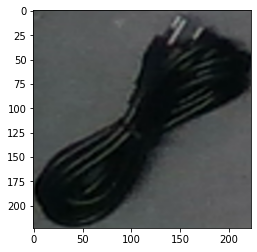

In [6]:
from matplotlib import pylab

pylab.imshow(df['X'][100])

In [8]:
import tensorflow as tf
import keras

In [33]:
model_b7 = tf.keras.applications.EfficientNetB7(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256, 256, 3),
    pooling='max',
    classes=1000,
    classifier_activation="softmax")

ValueError: When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (600, 600, 3).  Received: input_shape=(256, 256, 3)

In [31]:
model2 = keras.models.Model(inputs=model_b7.input, outputs=model_b7.get_layer('max_pool').output)

ValueError: No such layer: max_pool. Existing layers are: ['input_5', 'rescaling_4', 'normalization_4', 'tf.math.truediv_4', 'stem_conv_pad', 'stem_conv', 'stem_bn', 'stem_activation', 'block1a_dwconv', 'block1a_bn', 'block1a_activation', 'block1a_se_squeeze', 'block1a_se_reshape', 'block1a_se_reduce', 'block1a_se_expand', 'block1a_se_excite', 'block1a_project_conv', 'block1a_project_bn', 'block1b_dwconv', 'block1b_bn', 'block1b_activation', 'block1b_se_squeeze', 'block1b_se_reshape', 'block1b_se_reduce', 'block1b_se_expand', 'block1b_se_excite', 'block1b_project_conv', 'block1b_project_bn', 'block1b_drop', 'block1b_add', 'block1c_dwconv', 'block1c_bn', 'block1c_activation', 'block1c_se_squeeze', 'block1c_se_reshape', 'block1c_se_reduce', 'block1c_se_expand', 'block1c_se_excite', 'block1c_project_conv', 'block1c_project_bn', 'block1c_drop', 'block1c_add', 'block1d_dwconv', 'block1d_bn', 'block1d_activation', 'block1d_se_squeeze', 'block1d_se_reshape', 'block1d_se_reduce', 'block1d_se_expand', 'block1d_se_excite', 'block1d_project_conv', 'block1d_project_bn', 'block1d_drop', 'block1d_add', 'block2a_expand_conv', 'block2a_expand_bn', 'block2a_expand_activation', 'block2a_dwconv_pad', 'block2a_dwconv', 'block2a_bn', 'block2a_activation', 'block2a_se_squeeze', 'block2a_se_reshape', 'block2a_se_reduce', 'block2a_se_expand', 'block2a_se_excite', 'block2a_project_conv', 'block2a_project_bn', 'block2b_expand_conv', 'block2b_expand_bn', 'block2b_expand_activation', 'block2b_dwconv', 'block2b_bn', 'block2b_activation', 'block2b_se_squeeze', 'block2b_se_reshape', 'block2b_se_reduce', 'block2b_se_expand', 'block2b_se_excite', 'block2b_project_conv', 'block2b_project_bn', 'block2b_drop', 'block2b_add', 'block2c_expand_conv', 'block2c_expand_bn', 'block2c_expand_activation', 'block2c_dwconv', 'block2c_bn', 'block2c_activation', 'block2c_se_squeeze', 'block2c_se_reshape', 'block2c_se_reduce', 'block2c_se_expand', 'block2c_se_excite', 'block2c_project_conv', 'block2c_project_bn', 'block2c_drop', 'block2c_add', 'block2d_expand_conv', 'block2d_expand_bn', 'block2d_expand_activation', 'block2d_dwconv', 'block2d_bn', 'block2d_activation', 'block2d_se_squeeze', 'block2d_se_reshape', 'block2d_se_reduce', 'block2d_se_expand', 'block2d_se_excite', 'block2d_project_conv', 'block2d_project_bn', 'block2d_drop', 'block2d_add', 'block2e_expand_conv', 'block2e_expand_bn', 'block2e_expand_activation', 'block2e_dwconv', 'block2e_bn', 'block2e_activation', 'block2e_se_squeeze', 'block2e_se_reshape', 'block2e_se_reduce', 'block2e_se_expand', 'block2e_se_excite', 'block2e_project_conv', 'block2e_project_bn', 'block2e_drop', 'block2e_add', 'block2f_expand_conv', 'block2f_expand_bn', 'block2f_expand_activation', 'block2f_dwconv', 'block2f_bn', 'block2f_activation', 'block2f_se_squeeze', 'block2f_se_reshape', 'block2f_se_reduce', 'block2f_se_expand', 'block2f_se_excite', 'block2f_project_conv', 'block2f_project_bn', 'block2f_drop', 'block2f_add', 'block2g_expand_conv', 'block2g_expand_bn', 'block2g_expand_activation', 'block2g_dwconv', 'block2g_bn', 'block2g_activation', 'block2g_se_squeeze', 'block2g_se_reshape', 'block2g_se_reduce', 'block2g_se_expand', 'block2g_se_excite', 'block2g_project_conv', 'block2g_project_bn', 'block2g_drop', 'block2g_add', 'block3a_expand_conv', 'block3a_expand_bn', 'block3a_expand_activation', 'block3a_dwconv_pad', 'block3a_dwconv', 'block3a_bn', 'block3a_activation', 'block3a_se_squeeze', 'block3a_se_reshape', 'block3a_se_reduce', 'block3a_se_expand', 'block3a_se_excite', 'block3a_project_conv', 'block3a_project_bn', 'block3b_expand_conv', 'block3b_expand_bn', 'block3b_expand_activation', 'block3b_dwconv', 'block3b_bn', 'block3b_activation', 'block3b_se_squeeze', 'block3b_se_reshape', 'block3b_se_reduce', 'block3b_se_expand', 'block3b_se_excite', 'block3b_project_conv', 'block3b_project_bn', 'block3b_drop', 'block3b_add', 'block3c_expand_conv', 'block3c_expand_bn', 'block3c_expand_activation', 'block3c_dwconv', 'block3c_bn', 'block3c_activation', 'block3c_se_squeeze', 'block3c_se_reshape', 'block3c_se_reduce', 'block3c_se_expand', 'block3c_se_excite', 'block3c_project_conv', 'block3c_project_bn', 'block3c_drop', 'block3c_add', 'block3d_expand_conv', 'block3d_expand_bn', 'block3d_expand_activation', 'block3d_dwconv', 'block3d_bn', 'block3d_activation', 'block3d_se_squeeze', 'block3d_se_reshape', 'block3d_se_reduce', 'block3d_se_expand', 'block3d_se_excite', 'block3d_project_conv', 'block3d_project_bn', 'block3d_drop', 'block3d_add', 'block3e_expand_conv', 'block3e_expand_bn', 'block3e_expand_activation', 'block3e_dwconv', 'block3e_bn', 'block3e_activation', 'block3e_se_squeeze', 'block3e_se_reshape', 'block3e_se_reduce', 'block3e_se_expand', 'block3e_se_excite', 'block3e_project_conv', 'block3e_project_bn', 'block3e_drop', 'block3e_add', 'block3f_expand_conv', 'block3f_expand_bn', 'block3f_expand_activation', 'block3f_dwconv', 'block3f_bn', 'block3f_activation', 'block3f_se_squeeze', 'block3f_se_reshape', 'block3f_se_reduce', 'block3f_se_expand', 'block3f_se_excite', 'block3f_project_conv', 'block3f_project_bn', 'block3f_drop', 'block3f_add', 'block3g_expand_conv', 'block3g_expand_bn', 'block3g_expand_activation', 'block3g_dwconv', 'block3g_bn', 'block3g_activation', 'block3g_se_squeeze', 'block3g_se_reshape', 'block3g_se_reduce', 'block3g_se_expand', 'block3g_se_excite', 'block3g_project_conv', 'block3g_project_bn', 'block3g_drop', 'block3g_add', 'block4a_expand_conv', 'block4a_expand_bn', 'block4a_expand_activation', 'block4a_dwconv_pad', 'block4a_dwconv', 'block4a_bn', 'block4a_activation', 'block4a_se_squeeze', 'block4a_se_reshape', 'block4a_se_reduce', 'block4a_se_expand', 'block4a_se_excite', 'block4a_project_conv', 'block4a_project_bn', 'block4b_expand_conv', 'block4b_expand_bn', 'block4b_expand_activation', 'block4b_dwconv', 'block4b_bn', 'block4b_activation', 'block4b_se_squeeze', 'block4b_se_reshape', 'block4b_se_reduce', 'block4b_se_expand', 'block4b_se_excite', 'block4b_project_conv', 'block4b_project_bn', 'block4b_drop', 'block4b_add', 'block4c_expand_conv', 'block4c_expand_bn', 'block4c_expand_activation', 'block4c_dwconv', 'block4c_bn', 'block4c_activation', 'block4c_se_squeeze', 'block4c_se_reshape', 'block4c_se_reduce', 'block4c_se_expand', 'block4c_se_excite', 'block4c_project_conv', 'block4c_project_bn', 'block4c_drop', 'block4c_add', 'block4d_expand_conv', 'block4d_expand_bn', 'block4d_expand_activation', 'block4d_dwconv', 'block4d_bn', 'block4d_activation', 'block4d_se_squeeze', 'block4d_se_reshape', 'block4d_se_reduce', 'block4d_se_expand', 'block4d_se_excite', 'block4d_project_conv', 'block4d_project_bn', 'block4d_drop', 'block4d_add', 'block4e_expand_conv', 'block4e_expand_bn', 'block4e_expand_activation', 'block4e_dwconv', 'block4e_bn', 'block4e_activation', 'block4e_se_squeeze', 'block4e_se_reshape', 'block4e_se_reduce', 'block4e_se_expand', 'block4e_se_excite', 'block4e_project_conv', 'block4e_project_bn', 'block4e_drop', 'block4e_add', 'block4f_expand_conv', 'block4f_expand_bn', 'block4f_expand_activation', 'block4f_dwconv', 'block4f_bn', 'block4f_activation', 'block4f_se_squeeze', 'block4f_se_reshape', 'block4f_se_reduce', 'block4f_se_expand', 'block4f_se_excite', 'block4f_project_conv', 'block4f_project_bn', 'block4f_drop', 'block4f_add', 'block4g_expand_conv', 'block4g_expand_bn', 'block4g_expand_activation', 'block4g_dwconv', 'block4g_bn', 'block4g_activation', 'block4g_se_squeeze', 'block4g_se_reshape', 'block4g_se_reduce', 'block4g_se_expand', 'block4g_se_excite', 'block4g_project_conv', 'block4g_project_bn', 'block4g_drop', 'block4g_add', 'block4h_expand_conv', 'block4h_expand_bn', 'block4h_expand_activation', 'block4h_dwconv', 'block4h_bn', 'block4h_activation', 'block4h_se_squeeze', 'block4h_se_reshape', 'block4h_se_reduce', 'block4h_se_expand', 'block4h_se_excite', 'block4h_project_conv', 'block4h_project_bn', 'block4h_drop', 'block4h_add', 'block4i_expand_conv', 'block4i_expand_bn', 'block4i_expand_activation', 'block4i_dwconv', 'block4i_bn', 'block4i_activation', 'block4i_se_squeeze', 'block4i_se_reshape', 'block4i_se_reduce', 'block4i_se_expand', 'block4i_se_excite', 'block4i_project_conv', 'block4i_project_bn', 'block4i_drop', 'block4i_add', 'block4j_expand_conv', 'block4j_expand_bn', 'block4j_expand_activation', 'block4j_dwconv', 'block4j_bn', 'block4j_activation', 'block4j_se_squeeze', 'block4j_se_reshape', 'block4j_se_reduce', 'block4j_se_expand', 'block4j_se_excite', 'block4j_project_conv', 'block4j_project_bn', 'block4j_drop', 'block4j_add', 'block5a_expand_conv', 'block5a_expand_bn', 'block5a_expand_activation', 'block5a_dwconv', 'block5a_bn', 'block5a_activation', 'block5a_se_squeeze', 'block5a_se_reshape', 'block5a_se_reduce', 'block5a_se_expand', 'block5a_se_excite', 'block5a_project_conv', 'block5a_project_bn', 'block5b_expand_conv', 'block5b_expand_bn', 'block5b_expand_activation', 'block5b_dwconv', 'block5b_bn', 'block5b_activation', 'block5b_se_squeeze', 'block5b_se_reshape', 'block5b_se_reduce', 'block5b_se_expand', 'block5b_se_excite', 'block5b_project_conv', 'block5b_project_bn', 'block5b_drop', 'block5b_add', 'block5c_expand_conv', 'block5c_expand_bn', 'block5c_expand_activation', 'block5c_dwconv', 'block5c_bn', 'block5c_activation', 'block5c_se_squeeze', 'block5c_se_reshape', 'block5c_se_reduce', 'block5c_se_expand', 'block5c_se_excite', 'block5c_project_conv', 'block5c_project_bn', 'block5c_drop', 'block5c_add', 'block5d_expand_conv', 'block5d_expand_bn', 'block5d_expand_activation', 'block5d_dwconv', 'block5d_bn', 'block5d_activation', 'block5d_se_squeeze', 'block5d_se_reshape', 'block5d_se_reduce', 'block5d_se_expand', 'block5d_se_excite', 'block5d_project_conv', 'block5d_project_bn', 'block5d_drop', 'block5d_add', 'block5e_expand_conv', 'block5e_expand_bn', 'block5e_expand_activation', 'block5e_dwconv', 'block5e_bn', 'block5e_activation', 'block5e_se_squeeze', 'block5e_se_reshape', 'block5e_se_reduce', 'block5e_se_expand', 'block5e_se_excite', 'block5e_project_conv', 'block5e_project_bn', 'block5e_drop', 'block5e_add', 'block5f_expand_conv', 'block5f_expand_bn', 'block5f_expand_activation', 'block5f_dwconv', 'block5f_bn', 'block5f_activation', 'block5f_se_squeeze', 'block5f_se_reshape', 'block5f_se_reduce', 'block5f_se_expand', 'block5f_se_excite', 'block5f_project_conv', 'block5f_project_bn', 'block5f_drop', 'block5f_add', 'block5g_expand_conv', 'block5g_expand_bn', 'block5g_expand_activation', 'block5g_dwconv', 'block5g_bn', 'block5g_activation', 'block5g_se_squeeze', 'block5g_se_reshape', 'block5g_se_reduce', 'block5g_se_expand', 'block5g_se_excite', 'block5g_project_conv', 'block5g_project_bn', 'block5g_drop', 'block5g_add', 'block5h_expand_conv', 'block5h_expand_bn', 'block5h_expand_activation', 'block5h_dwconv', 'block5h_bn', 'block5h_activation', 'block5h_se_squeeze', 'block5h_se_reshape', 'block5h_se_reduce', 'block5h_se_expand', 'block5h_se_excite', 'block5h_project_conv', 'block5h_project_bn', 'block5h_drop', 'block5h_add', 'block5i_expand_conv', 'block5i_expand_bn', 'block5i_expand_activation', 'block5i_dwconv', 'block5i_bn', 'block5i_activation', 'block5i_se_squeeze', 'block5i_se_reshape', 'block5i_se_reduce', 'block5i_se_expand', 'block5i_se_excite', 'block5i_project_conv', 'block5i_project_bn', 'block5i_drop', 'block5i_add', 'block5j_expand_conv', 'block5j_expand_bn', 'block5j_expand_activation', 'block5j_dwconv', 'block5j_bn', 'block5j_activation', 'block5j_se_squeeze', 'block5j_se_reshape', 'block5j_se_reduce', 'block5j_se_expand', 'block5j_se_excite', 'block5j_project_conv', 'block5j_project_bn', 'block5j_drop', 'block5j_add', 'block6a_expand_conv', 'block6a_expand_bn', 'block6a_expand_activation', 'block6a_dwconv_pad', 'block6a_dwconv', 'block6a_bn', 'block6a_activation', 'block6a_se_squeeze', 'block6a_se_reshape', 'block6a_se_reduce', 'block6a_se_expand', 'block6a_se_excite', 'block6a_project_conv', 'block6a_project_bn', 'block6b_expand_conv', 'block6b_expand_bn', 'block6b_expand_activation', 'block6b_dwconv', 'block6b_bn', 'block6b_activation', 'block6b_se_squeeze', 'block6b_se_reshape', 'block6b_se_reduce', 'block6b_se_expand', 'block6b_se_excite', 'block6b_project_conv', 'block6b_project_bn', 'block6b_drop', 'block6b_add', 'block6c_expand_conv', 'block6c_expand_bn', 'block6c_expand_activation', 'block6c_dwconv', 'block6c_bn', 'block6c_activation', 'block6c_se_squeeze', 'block6c_se_reshape', 'block6c_se_reduce', 'block6c_se_expand', 'block6c_se_excite', 'block6c_project_conv', 'block6c_project_bn', 'block6c_drop', 'block6c_add', 'block6d_expand_conv', 'block6d_expand_bn', 'block6d_expand_activation', 'block6d_dwconv', 'block6d_bn', 'block6d_activation', 'block6d_se_squeeze', 'block6d_se_reshape', 'block6d_se_reduce', 'block6d_se_expand', 'block6d_se_excite', 'block6d_project_conv', 'block6d_project_bn', 'block6d_drop', 'block6d_add', 'block6e_expand_conv', 'block6e_expand_bn', 'block6e_expand_activation', 'block6e_dwconv', 'block6e_bn', 'block6e_activation', 'block6e_se_squeeze', 'block6e_se_reshape', 'block6e_se_reduce', 'block6e_se_expand', 'block6e_se_excite', 'block6e_project_conv', 'block6e_project_bn', 'block6e_drop', 'block6e_add', 'block6f_expand_conv', 'block6f_expand_bn', 'block6f_expand_activation', 'block6f_dwconv', 'block6f_bn', 'block6f_activation', 'block6f_se_squeeze', 'block6f_se_reshape', 'block6f_se_reduce', 'block6f_se_expand', 'block6f_se_excite', 'block6f_project_conv', 'block6f_project_bn', 'block6f_drop', 'block6f_add', 'block6g_expand_conv', 'block6g_expand_bn', 'block6g_expand_activation', 'block6g_dwconv', 'block6g_bn', 'block6g_activation', 'block6g_se_squeeze', 'block6g_se_reshape', 'block6g_se_reduce', 'block6g_se_expand', 'block6g_se_excite', 'block6g_project_conv', 'block6g_project_bn', 'block6g_drop', 'block6g_add', 'block6h_expand_conv', 'block6h_expand_bn', 'block6h_expand_activation', 'block6h_dwconv', 'block6h_bn', 'block6h_activation', 'block6h_se_squeeze', 'block6h_se_reshape', 'block6h_se_reduce', 'block6h_se_expand', 'block6h_se_excite', 'block6h_project_conv', 'block6h_project_bn', 'block6h_drop', 'block6h_add', 'block6i_expand_conv', 'block6i_expand_bn', 'block6i_expand_activation', 'block6i_dwconv', 'block6i_bn', 'block6i_activation', 'block6i_se_squeeze', 'block6i_se_reshape', 'block6i_se_reduce', 'block6i_se_expand', 'block6i_se_excite', 'block6i_project_conv', 'block6i_project_bn', 'block6i_drop', 'block6i_add', 'block6j_expand_conv', 'block6j_expand_bn', 'block6j_expand_activation', 'block6j_dwconv', 'block6j_bn', 'block6j_activation', 'block6j_se_squeeze', 'block6j_se_reshape', 'block6j_se_reduce', 'block6j_se_expand', 'block6j_se_excite', 'block6j_project_conv', 'block6j_project_bn', 'block6j_drop', 'block6j_add', 'block6k_expand_conv', 'block6k_expand_bn', 'block6k_expand_activation', 'block6k_dwconv', 'block6k_bn', 'block6k_activation', 'block6k_se_squeeze', 'block6k_se_reshape', 'block6k_se_reduce', 'block6k_se_expand', 'block6k_se_excite', 'block6k_project_conv', 'block6k_project_bn', 'block6k_drop', 'block6k_add', 'block6l_expand_conv', 'block6l_expand_bn', 'block6l_expand_activation', 'block6l_dwconv', 'block6l_bn', 'block6l_activation', 'block6l_se_squeeze', 'block6l_se_reshape', 'block6l_se_reduce', 'block6l_se_expand', 'block6l_se_excite', 'block6l_project_conv', 'block6l_project_bn', 'block6l_drop', 'block6l_add', 'block6m_expand_conv', 'block6m_expand_bn', 'block6m_expand_activation', 'block6m_dwconv', 'block6m_bn', 'block6m_activation', 'block6m_se_squeeze', 'block6m_se_reshape', 'block6m_se_reduce', 'block6m_se_expand', 'block6m_se_excite', 'block6m_project_conv', 'block6m_project_bn', 'block6m_drop', 'block6m_add', 'block7a_expand_conv', 'block7a_expand_bn', 'block7a_expand_activation', 'block7a_dwconv', 'block7a_bn', 'block7a_activation', 'block7a_se_squeeze', 'block7a_se_reshape', 'block7a_se_reduce', 'block7a_se_expand', 'block7a_se_excite', 'block7a_project_conv', 'block7a_project_bn', 'block7b_expand_conv', 'block7b_expand_bn', 'block7b_expand_activation', 'block7b_dwconv', 'block7b_bn', 'block7b_activation', 'block7b_se_squeeze', 'block7b_se_reshape', 'block7b_se_reduce', 'block7b_se_expand', 'block7b_se_excite', 'block7b_project_conv', 'block7b_project_bn', 'block7b_drop', 'block7b_add', 'block7c_expand_conv', 'block7c_expand_bn', 'block7c_expand_activation', 'block7c_dwconv', 'block7c_bn', 'block7c_activation', 'block7c_se_squeeze', 'block7c_se_reshape', 'block7c_se_reduce', 'block7c_se_expand', 'block7c_se_excite', 'block7c_project_conv', 'block7c_project_bn', 'block7c_drop', 'block7c_add', 'block7d_expand_conv', 'block7d_expand_bn', 'block7d_expand_activation', 'block7d_dwconv', 'block7d_bn', 'block7d_activation', 'block7d_se_squeeze', 'block7d_se_reshape', 'block7d_se_reduce', 'block7d_se_expand', 'block7d_se_excite', 'block7d_project_conv', 'block7d_project_bn', 'block7d_drop', 'block7d_add', 'top_conv', 'top_bn', 'top_activation', 'avg_pool', 'top_dropout', 'predictions'].

In [32]:
model_b7.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 600, 600, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 600, 600, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                     

                                                                                                  
 block1c_dwconv (DepthwiseConv2  (None, 300, 300, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 300, 300, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 300, 300, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_s

 )                              2)                                                                
                                                                                                  
 block2a_activation (Activation  (None, 150, 150, 19  0          ['block2a_bn[0][0]']             
 )                              2)                                                                
                                                                                                  
 block2a_se_squeeze (GlobalAver  (None, 192)         0           ['block2a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2a_se_squeeze[0][0]']     
                                                                                                  
 block2a_s

 block2c_se_squeeze (GlobalAver  (None, 288)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2c_se_reduce[0][0]']      
                                                                                                  
 block2c_se_excite (Multiply)   (None, 150, 150, 28  0           ['block2c_activation[0][0]',     
          

                                                                                                  
 block2e_se_squeeze (GlobalAver  (None, 288)         0           ['block2e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2e_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2e_se_squeeze[0][0]']     
                                                                                                  
 block2e_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2e_se_reshape[0][0]']     
                                                                                                  
 block2e_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2e_se_reduce[0][0]']      
                                                                                                  
 block2e_s

 )                              8)                                                                
                                                                                                  
 block2g_se_squeeze (GlobalAver  (None, 288)         0           ['block2g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2g_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2g_se_squeeze[0][0]']     
                                                                                                  
 block2g_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2g_se_reshape[0][0]']     
                                                                                                  
 block2g_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block2g_se_reduce[0][0]']      
          

                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_se_excite (Multiply)   (None, 75, 75, 480)  0           ['block3b_activation[0][0]',     
                                                                  'block3b_se_expand[0][0]']      
                                                                                                  
 block3b_p

 block3d_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3d_se_reduce[0][0]']      
                                                                                                  
 block3d_se_excite (Multiply)   (None, 75, 75, 480)  0           ['block3d_activation[0][0]',     
                                                                  'block3d_se_expand[0][0]']      
                                                                                                  
 block3d_project_conv (Conv2D)  (None, 75, 75, 80)   38400       ['block3d_se_excite[0][0]']      
                                                                                                  
 block3d_project_bn (BatchNorma  (None, 75, 75, 80)  320         ['block3d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3d_d

 block3f_project_conv (Conv2D)  (None, 75, 75, 80)   38400       ['block3f_se_excite[0][0]']      
                                                                                                  
 block3f_project_bn (BatchNorma  (None, 75, 75, 80)  320         ['block3f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3f_drop (Dropout)         (None, 75, 75, 80)   0           ['block3f_project_bn[0][0]']     
                                                                                                  
 block3f_add (Add)              (None, 75, 75, 80)   0           ['block3f_drop[0][0]',           
                                                                  'block3e_add[0][0]']            
                                                                                                  
 block3g_e

 block4a_project_bn (BatchNorma  (None, 38, 38, 160)  640        ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 38, 38, 960)  153600      ['block4a_project_bn[0][0]']     
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, 38, 38, 960)  3840       ['block4b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4b_expand_activation (Act  (None, 38, 38, 960)  0          ['block4b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block4d_expand_bn (BatchNormal  (None, 38, 38, 960)  3840       ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 38, 38, 960)  0          ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv (DepthwiseConv2  (None, 38, 38, 960)  8640       ['block4d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4d_bn (BatchNormalization  (None, 38, 38, 960)  3840       ['block4d_dwconv[0][0]']         
 )        

                                                                                                  
 block4f_dwconv (DepthwiseConv2  (None, 38, 38, 960)  8640       ['block4f_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4f_bn (BatchNormalization  (None, 38, 38, 960)  3840       ['block4f_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4f_activation (Activation  (None, 38, 38, 960)  0          ['block4f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4f_s

 )                                                                                                
                                                                                                  
 block4h_activation (Activation  (None, 38, 38, 960)  0          ['block4h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4h_se_squeeze (GlobalAver  (None, 960)         0           ['block4h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4h_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4h_se_squeeze[0][0]']     
                                                                                                  
 block4h_s

 block4j_se_squeeze (GlobalAver  (None, 960)         0           ['block4j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4j_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4j_se_squeeze[0][0]']     
                                                                                                  
 block4j_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4j_se_reshape[0][0]']     
                                                                                                  
 block4j_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4j_se_reduce[0][0]']      
                                                                                                  
 block4j_se_excite (Multiply)   (None, 38, 38, 960)  0           ['block4j_activation[0][0]',     
          

 block5b_se_excite (Multiply)   (None, 38, 38, 1344  0           ['block5b_activation[0][0]',     
                                )                                 'block5b_se_expand[0][0]']      
                                                                                                  
 block5b_project_conv (Conv2D)  (None, 38, 38, 224)  301056      ['block5b_se_excite[0][0]']      
                                                                                                  
 block5b_project_bn (BatchNorma  (None, 38, 38, 224)  896        ['block5b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_drop (Dropout)         (None, 38, 38, 224)  0           ['block5b_project_bn[0][0]']     
                                                                                                  
 block5b_a

 block5d_project_conv (Conv2D)  (None, 38, 38, 224)  301056      ['block5d_se_excite[0][0]']      
                                                                                                  
 block5d_project_bn (BatchNorma  (None, 38, 38, 224)  896        ['block5d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5d_drop (Dropout)         (None, 38, 38, 224)  0           ['block5d_project_bn[0][0]']     
                                                                                                  
 block5d_add (Add)              (None, 38, 38, 224)  0           ['block5d_drop[0][0]',           
                                                                  'block5c_add[0][0]']            
                                                                                                  
 block5e_e

 lization)                                                                                        
                                                                                                  
 block5f_drop (Dropout)         (None, 38, 38, 224)  0           ['block5f_project_bn[0][0]']     
                                                                                                  
 block5f_add (Add)              (None, 38, 38, 224)  0           ['block5f_drop[0][0]',           
                                                                  'block5e_add[0][0]']            
                                                                                                  
 block5g_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5f_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5g_e

                                                                                                  
 block5h_add (Add)              (None, 38, 38, 224)  0           ['block5h_drop[0][0]',           
                                                                  'block5g_add[0][0]']            
                                                                                                  
 block5i_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5h_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5i_expand_bn (BatchNormal  (None, 38, 38, 1344  5376       ['block5i_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5i_e

                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 38, 38, 1344  301056      ['block5j_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6a_expand_bn (BatchNormal  (None, 38, 38, 1344  5376       ['block6a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6a_expand_activation (Act  (None, 38, 38, 1344  0          ['block6a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6a_d

 ization)                       )                                                                 
                                                                                                  
 block6c_expand_activation (Act  (None, 19, 19, 2304  0          ['block6c_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 19, 19, 2304  57600      ['block6c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6c_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6c_dwconv[0][0]']         
 )                              )                                                                 
          

 ivation)                       )                                                                 
                                                                                                  
 block6e_dwconv (DepthwiseConv2  (None, 19, 19, 2304  57600      ['block6e_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6e_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6e_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6e_activation (Activation  (None, 19, 19, 2304  0          ['block6e_bn[0][0]']             
 )                              )                                                                 
          

 D)                             )                                ']                               
                                                                                                  
 block6g_bn (BatchNormalization  (None, 19, 19, 2304  9216       ['block6g_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6g_activation (Activation  (None, 19, 19, 2304  0          ['block6g_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6g_se_squeeze (GlobalAver  (None, 2304)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
          

 )                              )                                                                 
                                                                                                  
 block6i_activation (Activation  (None, 19, 19, 2304  0          ['block6i_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 2304)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6i_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6i_se_squeeze[0][0]']     
                                                                                                  
 block6i_s

 )                              )                                                                 
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 2304)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6k_se_squeeze[0][0]']     
                                                                                                  
 block6k_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6k_se_reshape[0][0]']     
                                                                                                  
 block6k_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6k_se_reduce[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block6m_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6m_se_reshape[0][0]']     
                                                                                                  
 block6m_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6m_se_reduce[0][0]']      
                                                                                                  
 block6m_se_excite (Multiply)   (None, 19, 19, 2304  0           ['block6m_activation[0][0]',     
                                )                                 'block6m_se_expand[0][0]']      
          

 block7b_se_excite (Multiply)   (None, 19, 19, 3840  0           ['block7b_activation[0][0]',     
                                )                                 'block7b_se_expand[0][0]']      
                                                                                                  
 block7b_project_conv (Conv2D)  (None, 19, 19, 640)  2457600     ['block7b_se_excite[0][0]']      
                                                                                                  
 block7b_project_bn (BatchNorma  (None, 19, 19, 640)  2560       ['block7b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 19, 19, 640)  0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_a

 block7d_project_conv (Conv2D)  (None, 19, 19, 640)  2457600     ['block7d_se_excite[0][0]']      
                                                                                                  
 block7d_project_bn (BatchNorma  (None, 19, 19, 640)  2560       ['block7d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7d_drop (Dropout)         (None, 19, 19, 640)  0           ['block7d_project_bn[0][0]']     
                                                                                                  
 block7d_add (Add)              (None, 19, 19, 640)  0           ['block7d_drop[0][0]',           
                                                                  'block7c_add[0][0]']            
                                                                                                  
 top_conv 

In [35]:
emb_b7_1.shape

TensorShape([144, 2560])

In [72]:
emb_b7_2 = model2(preprocessing(df)[0])

In [70]:
import numpy as np
from skimage.transform import resize
import pandas as pd


def normalize(x):
    return x/255


def preprocessing(df):
    data_x = np.zeros((len(df),256,256,3))
    data_y = np.zeros((len(df),1))
    mean=0
    for i in range(len(df)):
        data_y[i] = df['y'][i]
        temp_df = np.array(df['X'][i][:,:,0:3])
        temp_df_shape = np.array(df['X'][i][:,:,0:3]).shape

        mean += np.mean(temp_df)
        max_shape = np.max(temp_df_shape)
        max_shape_orient = np.where(temp_df_shape==max_shape) # zwróci 0 albo 1
        temp_arr = np.zeros((max_shape,max_shape,3)) ## mozna czymś wypełnić tło

        if max_shape_orient[0][0] == 0:
            t = (temp_df_shape[0] - temp_df_shape[1])//2
            temp_arr[:,t:t+temp_df_shape[1],:] = temp_df

        elif max_shape_orient[0][0] == 1:
            t = (temp_df_shape[1] - temp_df_shape[0])//2
            temp_arr[t:t+temp_df_shape[0],:,:] = temp_df
        

        data_x[i] = resize(temp_arr, (256, 256))

    data_x = np.where(data_x==0,mean/i,data_x)
            


    return data_x, data_y

In [71]:
X, y = preprocessing(df)

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [43]:
pca.fit(emb_b7_1)

PCA(n_components=2)

In [44]:
pca_proj = pca.transform(emb_b7_1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 144 samples in 0.001s...
[t-SNE] Computed neighbors for 144 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 25.159494
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.591705
[t-SNE] KL divergence after 1000 iterations: 0.354399


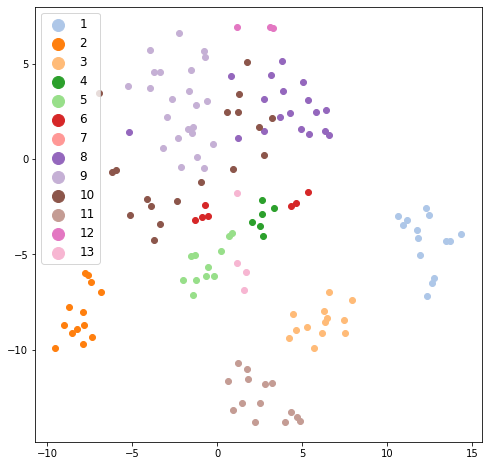

In [127]:
from sklearn.manifold import TSNE
from matplotlib import cm
import matplotlib.pyplot as plt

# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(emb_b7_2)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 12
for lab in range(1, num_categories+2):
    indices = y==lab
    ax.scatter(tsne_proj[indices[:,0],0],tsne_proj[indices[:,0],1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=1)
ax.legend(fontsize='large', markerscale=2)
plt.show()

In [ ]:
def compute_distances(method='euclidean', mode='all'):
    if mode='all':
        distances = np.zeros((emb_b7_2.shape[0],emb_b7_2.shape[0]))
        for i in range(emb_b7_2.shape[0]):
            #if i>emb_b7_2.shape[0]/2:
                #break
            for j in range(emb_b7_2.shape[0]):
                distances[i,j] = np.linalg.norm(emb_b7_2[i]-emb_b7_2[j]) # norm to euclidean
                distances[j,i] = np.linalg.norm(emb_b7_2[i]-emb_b7_2[j]) # norm to euclidean
    return distances

In [99]:
distances = np.zeros((emb_b7_2.shape[0],emb_b7_2.shape[0]))
for i in range(emb_b7_2.shape[0]):
    #if i>emb_b7_2.shape[0]/2:
        #break
    for j in range(emb_b7_2.shape[0]):
        distances[i,j] = np.linalg.norm(emb_b7_2[i]-emb_b7_2[j])
        distances[j,i] = np.linalg.norm(emb_b7_2[i]-emb_b7_2[j])

In [131]:
mean_dist_in_cat = np.zeros((13))
for i in range(1, 14):
    print(i)
    ids = df.loc[df['y']==i].index
    if len(ids)==0:
        pass
    else:
        checked = distances[ids[0]]
        mean_dist_in_cat[i-1] = checked[ids[1:]].mean()

1
2
3
4
5
6
7
8
9
10
11
12
13


In [132]:
mean_dist_in_cat

array([68.22411669, 57.69507806, 53.9811662 , 49.88217316, 48.99222069,
       63.14176114,  0.        , 63.09486726, 55.28519284, 66.39235844,
       58.8690655 , 65.22751808, 55.47953033])

In [138]:
mean_dist_sub_cat = np.zeros((144, 13))

for i in range(144):
    checked = distances[i]
    for j in range(1,14):
        ids = df.loc[df['y']==j].index
        if len(ids)==0:
            pass
        elif(i in ids):
            mean_dist_sub_cat[i,j-1] = mean_dist_in_cat[j-1]
        else:
            mean_dist_sub_cat[i,j-1] = checked[ids].mean()
        


In [139]:
mean_dist_sub_cat

array([[89.47254126, 81.82321108, 82.92499073, ..., 84.53651919,
        62.50251261, 78.91438675],
       [79.97112111, 68.71196982, 69.35251177, ..., 71.74975749,
        66.32491811, 62.2342205 ],
       [87.45078659, 73.10835149, 78.59187376, ..., 79.64265605,
        73.53460948, 68.60241127],
       ...,
       [86.2683645 , 79.0818681 , 53.9811662 , ..., 73.02336448,
        87.73001099, 74.09162903],
       [83.27786473, 73.93942613, 53.9811662 , ..., 71.55072185,
        82.2624232 , 69.11179447],
       [90.8366345 , 73.75377362, 81.75524726, ..., 86.11170088,
        65.22751808, 71.29519653]])

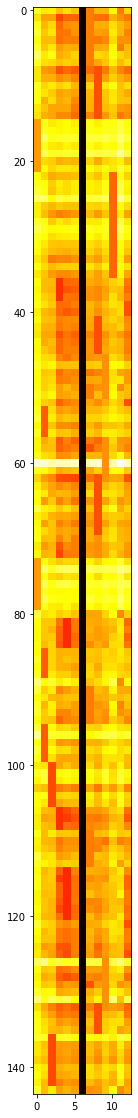

In [141]:
plt.figure(figsize=(20,20))
plt.imshow(mean_dist_sub_cat, cmap='hot', interpolation='nearest')
plt.show()